In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns        
%matplotlib inline
from sklearn import preprocessing,metrics 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('Edited Dataset.csv')

In [3]:
data.head()

,loan_amnt,term(months),int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status(of income),purpose,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,27050.0,36.0,10.99,885.46,B,10+ years,OWN,55000.0,Verified,debt_consolidation,...,16-Feb,15-Dec,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,Current
1,9750.0,36.0,13.98,333.14,C,1 year,RENT,26000.0,Not Verified,debt_consolidation,...,16-Feb,16-Jan,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,Current
2,12000.0,36.0,6.62,368.45,A,10+ years,MORTGAGE,105000.0,Not Verified,debt_consolidation,...,16-Feb,16-Jan,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,Current
3,12000.0,36.0,13.53,407.40,B,10+ years,RENT,40000.0,Source Verified,debt_consolidation,...,NaN,16-Jan,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,Fully Paid
4,15000.0,36.0,8.90,476.30,A,2 years,MORTGAGE,63000.0,Not Verified,debt_consolidation,...,16-Feb,16-Jan,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,Current


In [4]:
data_dict=pd.read_excel('LCDataDictionary.xlsx',sheet_name='LoanStats')
pd.set_option('max_colwidth',500)

In [5]:
data_dtypes=pd.DataFrame(data.dtypes,columns=['dtype'])
data_dtypes.reset_index(inplace=True)
data_dtypes.columns=['LoanStatNew', 'dtype']
data_dtypes['first value'] = data.loc[0].values

In [6]:
data_col=data_dtypes.merge(data_dict, on='LoanStatNew',how='left')

In [7]:
data_col.head(10)

,LoanStatNew,dtype,first value,Description
0,loan_amnt,float64,27050,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term(months),float64,36,NaN
2,int_rate,float64,10.99,Interest Rate on the loan
3,installment,float64,885.46,The monthly payment owed by the borrower if the loan originates.
4,grade,object,B,LC assigned loan grade
5,emp_length,object,10+ years,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
6,home_ownership,object,OWN,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
7,annual_inc,float64,55000,The self-reported annual income provided by the borrower during registration.
8,verification_status(of income),object,Verified,NaN
9,purpose,object,debt_consolidation,A category provided by the borrower for the loan request.


In [8]:
data['loan_status'].value_counts()

Current               599819
Fully Paid            175572
Charged Off            39674
Late (31-120 days)     11491
Issued                  8460
In Grace Period         6225
Late (16-30 days)       2331
Default                 1210
Late                      59
Late                       3
Name: loan_status, dtype: int64

In [9]:
default=['Charged Off','Late (31-120 days)','Default']
data['loan_status']=data['loan_status'].apply(lambda x: 'Default' if x in default else x)

In [10]:
data=data[(data['loan_status']=='Default') | (data['loan_status']=='Fully Paid')]

In [11]:
data.head()

,loan_amnt,term(months),int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status(of income),purpose,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
3,12000.0,36.0,13.53,407.40,B,10+ years,RENT,40000.0,Source Verified,debt_consolidation,...,NaN,16-Jan,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,Fully Paid
9,3000.0,36.0,12.85,100.87,B,10+ years,RENT,25000.0,Verified,debt_consolidation,...,NaN,16-Jan,0.0,1.0,INDIVIDUAL,0.0,154.0,19530.0,5300.0,Fully Paid
11,28000.0,36.0,7.62,872.52,A,5 years,MORTGAGE,325000.0,Source Verified,debt_consolidation,...,NaN,14-Aug,0.0,1.0,INDIVIDUAL,0.0,0.0,799592.0,54200.0,Fully Paid
14,24000.0,36.0,13.53,814.80,B,10+ years,MORTGAGE,100000.0,Verified,credit_card,...,NaN,15-Dec,0.0,1.0,INDIVIDUAL,0.0,539.0,199834.0,28200.0,Fully Paid
17,15000.0,36.0,14.47,516.10,C,10+ years,RENT,98000.0,Not Verified,debt_consolidation,...,NaN,16-Jan,0.0,1.0,INDIVIDUAL,0.0,0.0,13038.0,25800.0,Fully Paid


In [12]:
data.drop(['out_prncp','earliest_cr_line','total_rec_int','last_pymnt_d','next_pymnt_d','last_credit_pull_d','policy_code',],axis=1,inplace=True)

In [13]:
#FINDING IF THERE EXISTS ANY MISSING VALUEs
data.isnull().values.any()
data.isnull().sum()

loan_amnt                             0
term(months)                          0
int_rate                              0
installment                           0
grade                                 0
emp_length                         9674
home_ownership                        0
annual_inc                            0
verification_status(of income)        0
purpose                               0
issue_d                               0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                          159
total_acc                             0
initial_list_status                   0
total_pymnt                           0
total_rec_prncp                       0
total_rec_late_fee                    0
recoveries                            0
collection_recovery_fee               0


In [14]:
data.fillna(method='pad', inplace = True)
data.isnull().sum()

loan_amnt                         0
term(months)                      0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status(of income)    0
purpose                           0
issue_d                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
total_pymnt                       0
total_rec_prncp                   0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med        0
application_type            

In [15]:
#relation between average loan amount and loan status
data[['loan_amnt','loan_status']].groupby(by='loan_status').mean()

#Loan defaulters tend to apply for larger loans.

,loan_amnt
loan_status,
Default,15059.161337
Fully Paid,13818.392882


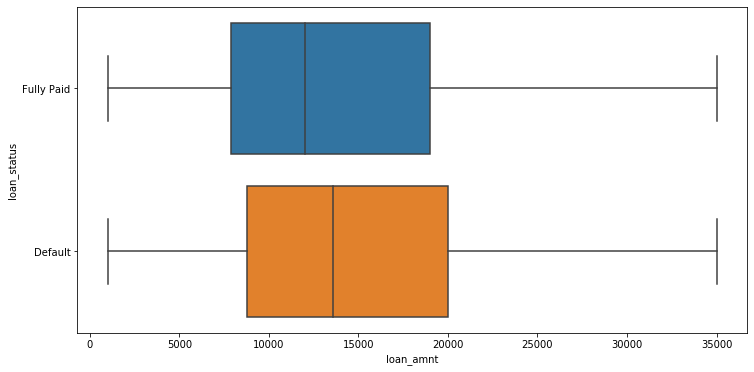

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data['loan_amnt'],data['loan_status'])

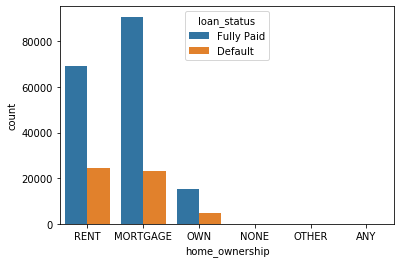

In [17]:
data['home_ownership'].value_counts()
sns.countplot(x='home_ownership',hue='loan_status',data=data)

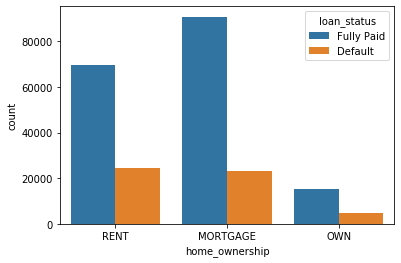

In [18]:
#Change OHTER, NONE, ANY to RENT as these data points are too low.
data['home_ownership']=data['home_ownership'].apply(lambda x: 'RENT' if x in ['OTHER','NONE','ANY'] else x)
sns.countplot(x='home_ownership',hue='loan_status',data=data)

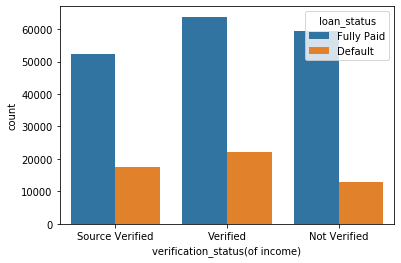

In [19]:
#verification_status
data['verification_status(of income)'].value_counts()
sns.countplot(x='verification_status(of income)',hue='loan_status',data=data)

In [20]:
#purpose
print("Unique values in purpose column:",data['purpose'].unique())
data['purpose'].value_counts()

Unique values in purpose column: ['debt_consolidation' 'credit_card' 'home_improvement' 'major_purchase'
 'other' 'moving' 'small_business' 'car' 'vacation' 'medical'
 'renewable_energy' 'house' 'wedding']


debt_consolidation    138849
credit_card            47446
home_improvement       12830
other                  11123
major_purchase          4384
small_business          3252
medical                 2330
car                     2287
moving                  1560
house                   1361
vacation                1289
wedding                 1059
renewable_energy         177
Name: purpose, dtype: int64

In [21]:
def get_default_rate_by_col(column):
    """
    Param:
        column: str, column for which default rate is to be calculated for it's unique values. Column must have limited
        unique values.
    """
    tmp=pd.DataFrame(data[data['loan_status']=='Default'][column].value_counts()/data[column].value_counts())
    tmp.columns=[column+'_Default_Rate']
    tmp=tmp.join(data[column].value_counts())
    tmp.columns=[column+'_Default_Rate',column+'_Count']
    return tmp

In [22]:
#Get the defalut rate for each laon purpose.
get_default_rate_by_col('purpose')
#Loans for small_business are highly probable to default.

,purpose_Default_Rate,purpose_Count
car,0.161347,2287
credit_card,0.202441,47446
debt_consolidation,0.237697,138849
home_improvement,0.204988,12830
house,0.216018,1361
major_purchase,0.198677,4384
medical,0.258369,2330
moving,0.277564,1560
other,0.265846,11123
renewable_energy,0.248588,177


f    151239
w     76708
Name: initial_list_status, dtype: int64


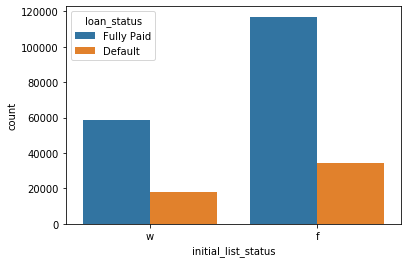

In [23]:
#initial_list_status
print(data['initial_list_status'].value_counts())
sns.countplot(x='initial_list_status',hue='loan_status',data=data)

In [24]:
print(get_default_rate_by_col('initial_list_status'))

data.drop('initial_list_status',axis=1,inplace=True)

   initial_list_status_Default_Rate  initial_list_status_Count
f                          0.226423                     151239
w                          0.236364                      76708


In [25]:
#application_type

print(data['application_type'].value_counts())
data.drop('application_type',axis=1,inplace=True)

INDIVIDUAL    227944
JOINT              3
Name: application_type, dtype: int64


In [26]:
data["emp_length"] = data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)

In [27]:
dataset1 = data[:].copy()


In [28]:
le1 = LabelEncoder() 
cl = ['purpose','verification_status(of income)','grade','home_ownership','loan_status']
for i in cl:
    dataset1[i]= le1.fit_transform(dataset1[i])


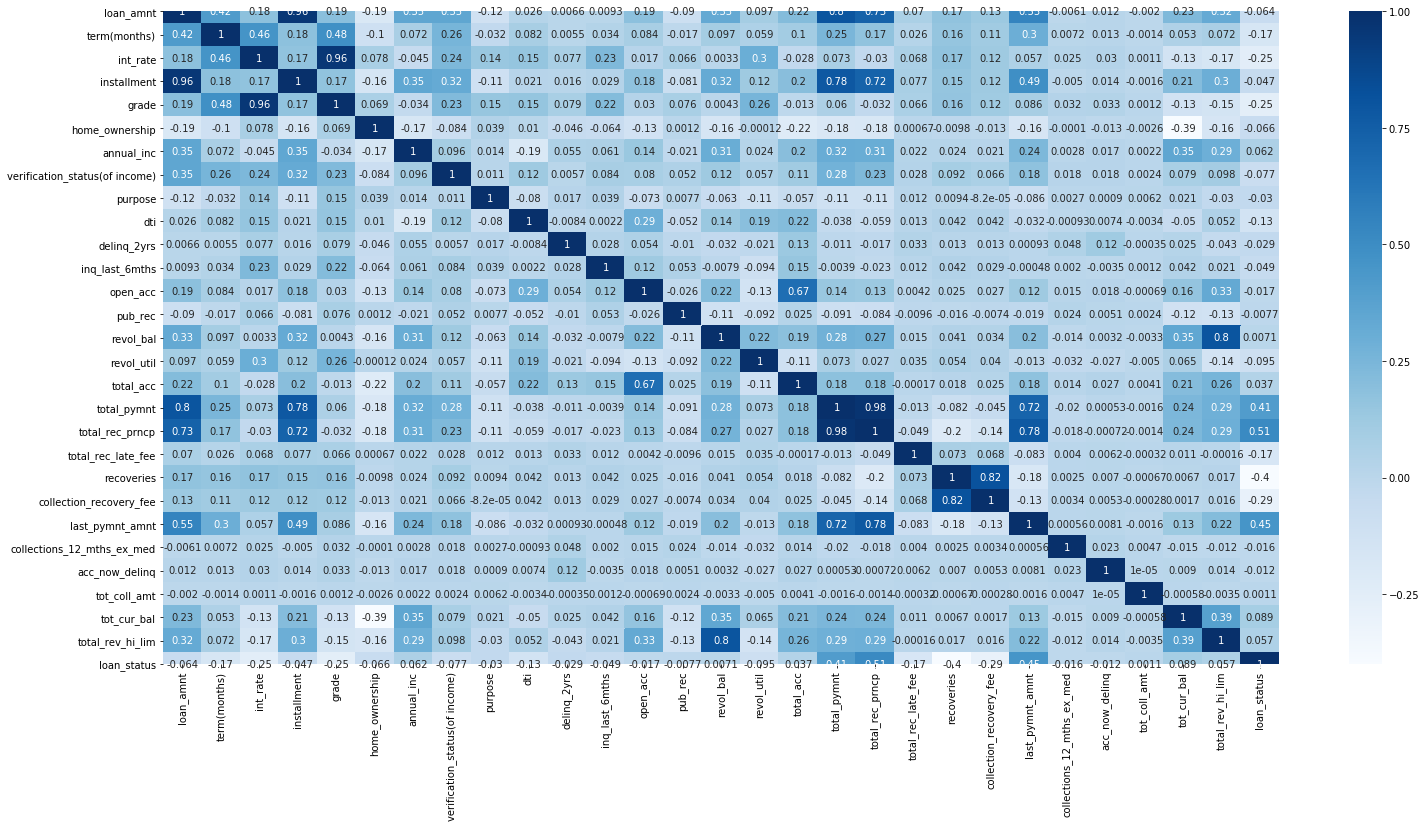

In [29]:
plt.figure(figsize=(25,12))
cor = dataset1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [30]:
#Correlation with output variable
cor_target = abs(cor["loan_status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

term(months)               0.165936
int_rate                   0.251453
grade                      0.253210
dti                        0.134746
total_pymnt                0.411259
total_rec_prncp            0.513515
total_rec_late_fee         0.170659
recoveries                 0.399768
collection_recovery_fee    0.292621
last_pymnt_amnt            0.454980
loan_status                1.000000
Name: loan_status, dtype: float64

In [31]:
relevant = ['term(months)','int_rate','emp_length','grade','dti','home_ownership','verification_status(of income)','revol_bal','purpose','revol_util','total_pymnt','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','tot_cur_bal','open_acc','pub_rec','loan_status']
Final= data[relevant] 
print("Current shape of dataset :",Final.shape)

Current shape of dataset : (227947, 20)


In [32]:
Final.head()

,term(months),int_rate,emp_length,grade,dti,home_ownership,verification_status(of income),revol_bal,purpose,revol_util,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,open_acc,pub_rec,loan_status
3,36.0,13.53,10,B,16.94,RENT,Source Verified,5572.0,debt_consolidation,68.8,13359.770000,11999.99,0.0,0.0,0.0,119.17,13605.0,7.0,2.0,Fully Paid
9,36.0,12.85,10,B,24.68,RENT,Verified,2875.0,debt_consolidation,54.2,3181.532981,3000.00,0.0,0.0,0.0,2677.23,19530.0,5.0,2.0,Fully Paid
11,36.0,7.62,5,A,18.55,MORTGAGE,Source Verified,29581.0,debt_consolidation,54.6,29150.980000,28000.00,0.0,0.0,0.0,23915.86,799592.0,15.0,0.0,Fully Paid
14,36.0,13.53,10,B,22.18,MORTGAGE,Verified,21617.0,credit_card,76.7,28652.210000,24000.00,0.0,0.0,0.0,10726.61,199834.0,14.0,0.0,Fully Paid
17,36.0,14.47,10,C,6.15,RENT,Not Verified,5749.0,debt_consolidation,22.3,15699.030000,14999.99,0.0,0.0,0.0,14150.76,13038.0,16.0,0.0,Fully Paid


In [33]:
#Create dummy variables for categorical columns
cat_cols=['term(months)','grade','home_ownership','verification_status(of income)','purpose']
for col in cat_cols:
    Final=Final.join(pd.get_dummies(Final[col],drop_first=True))
Final.drop(cat_cols,axis=1,inplace=True)

In [34]:
#Create dummy variables for categorical columns
Final=Final.join(pd.get_dummies(Final['loan_status'],drop_first=True))
Final.drop('loan_status',axis=1,inplace=True)

In [35]:
Final.head()

,int_rate,emp_length,dti,revol_bal,revol_util,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,...,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Fully Paid
3,13.53,10,16.94,5572.0,68.8,13359.770000,11999.99,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
9,12.85,10,24.68,2875.0,54.2,3181.532981,3000.00,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
11,7.62,5,18.55,29581.0,54.6,29150.980000,28000.00,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
14,13.53,10,22.18,21617.0,76.7,28652.210000,24000.00,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
17,14.47,10,6.15,5749.0,22.3,15699.030000,14999.99,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
X = Final.iloc[:,:-1].values
y = Final.iloc[:, -1].values


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:] = sc.fit_transform(X_train[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

In [39]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

y_pred1 = log.predict(X_test)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_pred1, y_test)
print(cm1)
accuracy_score(y_pred1, y_test)

[[10105   425]
 [  485 34575]]


0.980039482342619

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier3.fit(X_train, y_train)

y_pred4 = classifier3.predict(X_test)

from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
accuracy_score(y_pred4, y_test)

[[ 7355  3235]
 [ 1090 33910]]


0.9051327045404693

In [41]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(n_estimators = 3, criterion = "entropy")
rand.fit(X_train,y_train)

y_pred5= rand.predict(X_test)

cm5 = confusion_matrix(y_pred5, y_test)
print(cm5)
accuracy_score(y_pred5, y_test)

[[10015   446]
 [  575 34554]]


0.9776047378811142

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(max_depth=1)
xgb.fit(X_train, y_train)

y_pred6 = xgb.predict(X_test)

cm6 =confusion_matrix(y_pred6, y_test)
print(cm6)
accuracy_score(y_pred6, y_test)

[[ 9365   736]
 [ 1225 34264]]


0.9569861811800834

In [43]:
from sklearn.metrics import classification_report
print("Logistic Regression",classification_report(y_test, y_pred1, target_names=None))
print("KNN",classification_report(y_test, y_pred4, target_names=None))
print("Random Forest",classification_report(y_test, y_pred5, target_names=None))
print("XGBoost",classification_report(y_test, y_pred6, target_names=None))

Logistic Regression               precision    recall  f1-score   support

           0       0.96      0.95      0.96     10590
           1       0.99      0.99      0.99     35000

    accuracy                           0.98     45590
   macro avg       0.97      0.97      0.97     45590
weighted avg       0.98      0.98      0.98     45590

KNN               precision    recall  f1-score   support

           0       0.87      0.69      0.77     10590
           1       0.91      0.97      0.94     35000

    accuracy                           0.91     45590
   macro avg       0.89      0.83      0.86     45590
weighted avg       0.90      0.91      0.90     45590

Random Forest               precision    recall  f1-score   support

           0       0.96      0.95      0.95     10590
           1       0.98      0.99      0.99     35000

    accuracy                           0.98     45590
   macro avg       0.97      0.97      0.97     45590
weighted avg       0.98      0.98   